# Classification

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import warnings 
warnings.filterwarnings("ignore")

# import dat
data = pd.read_csv("orthopedic_patients_biomechanics_features_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


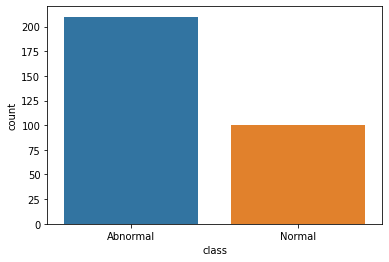

In [3]:
# visualize which classes you have.
sns.countplot(data["class"]) # There are two classes, abnormal and normal.
plt.show()

In [4]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [5]:
# there is a dataset that consists entirely of numeric variables.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


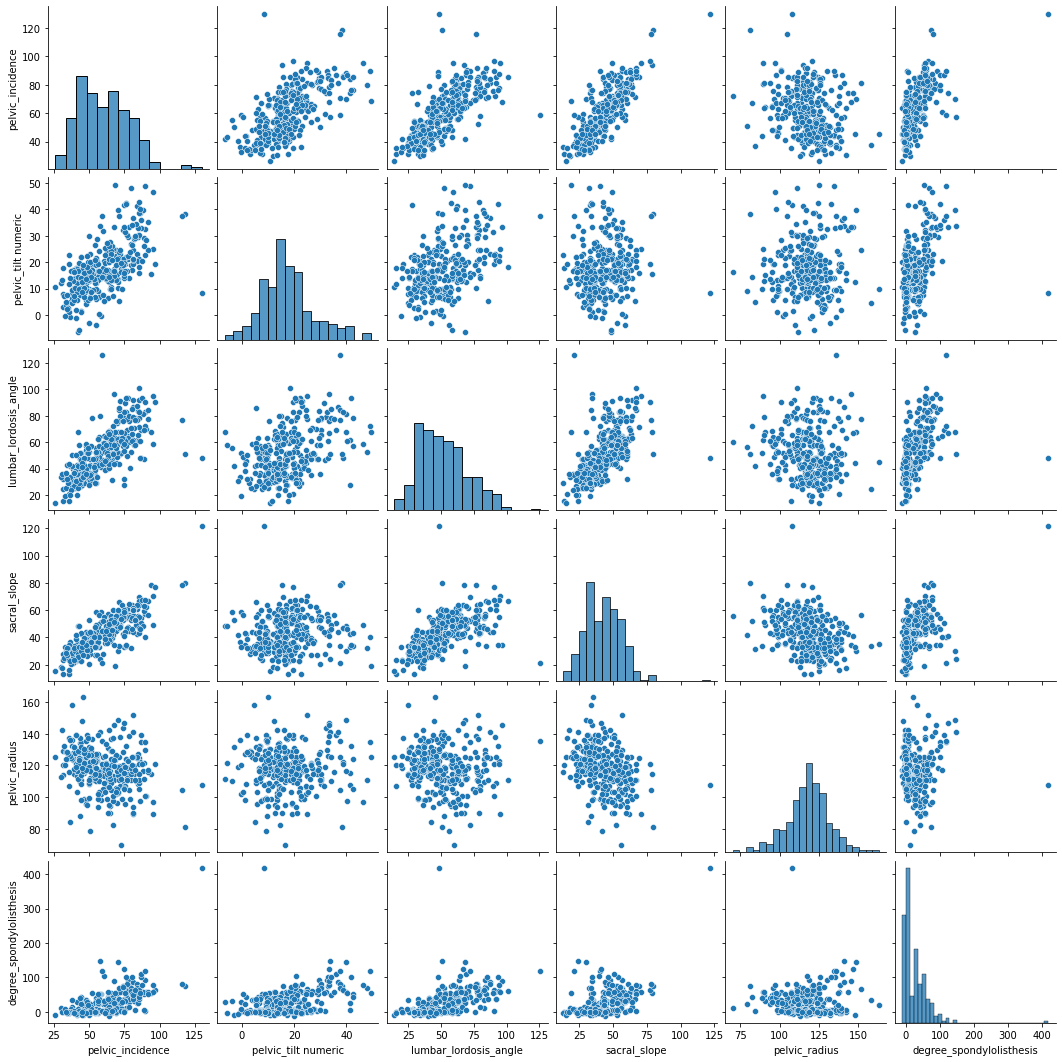

In [6]:
y = data["class"].values
x_data = data.drop(["class"], axis = 1)

sns.pairplot(x_data)
plt.show()

In [7]:
# min-max normalization
# all values ​​are compressed between 0 and 1.
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

* Note: If any of the maximum or minimum values ​​is excessively large or extremely small due to noise or erroneous data, the actual data may be stuck in a very narrow range between 0 and 1.
* Instead, z score standardization can also be done.

## Logistic Regression
* Even if logistic regression is named after regression, it is actually a classification algorithm.
* It is often used in datasets that contain two classes.
### How to learn logistic regression ? 
   1. The weights are multiplied by the input and the slope is added. z = (w.t)x + b 
   2. The output of the first item is inserted into the sigmoid function(z).
   3. The output of the sigmoid function is a probabilistic result and this result is inserted into the loss function.
   4. Cost is obtained by summing the lost function outputs.
   5. The change(derivative) is calculated according to the cost costs.
   6. Parameters are also updated with gradient descent.
   7. By repeating this process, optimal weights and trend values ​​are obtained.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# training/test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.15, random_state = 42)

lr = LogisticRegression()
lr.fit(x_train,y_train)

training_accuracy = lr.score(x_train, y_train)
print("training_accuracy: ", training_accuracy)

test_accuracy = lr.score(x_test, y_test)
print("test_accuracy", test_accuracy)


training_accuracy:  0.7490494296577946
test_accuracy 0.7872340425531915


## K-Nearest Neighbors K-NN
* The K-Nearest neighbors algorithm is to look at the proximity of the new individual to be classified to k of the previous individuals from the features extracted during classification.
* Euclidean distance is generally used for proximity.

In [10]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
number_neighbors = 12
knn = KNeighborsClassifier(n_neighbors = number_neighbors)
knn.fit(x_train, y_train)

prediction = knn.predict(x_test)
score = knn.score(x_test, y_test) 
print("{} nearest neighbor algorithm test accuracy: {}".format(number_neighbors, score))


12 nearest neighbor algorithm test accuracy: 0.7872340425531915


* The Best K Value

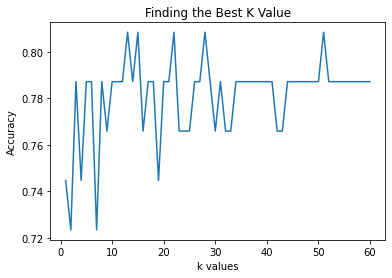

In [11]:
# Finding the Best K Value
score_list = []
for each in range(1, 61):
  knn2 = KNeighborsClassifier(n_neighbors = each)
  knn2.fit(x_train, y_train)
  score = knn2.score(x_test, y_test)
  score_list.append(score)

plt.plot(range(1,61), score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("Finding the Best K Value")
plt.show()


## Support Vector Machine - SVM
* A support vector machine can be defined as a vector space based machine learning method that finds a decision boundary between the two classes that are furthest from any point in the training data.
* A support vector machine is a supervised learning algorithm.
* It is mainly used to separate data belonging to two classes with support vectors in the most appropriate way.
* The linear or non-linear datasets can be classified by the support vector machine algorithm.

In [13]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
svm_score = svm.score(x_test, y_test)

print("Support Vector Machine Model Accuracy: ", svm_score )

Support Vector Machine Model Accuracy:  0.851063829787234


## Decision Tree 
* A decision tree is a flowchart-like structure in which each internal node represents a test on an attribute, each branch represents the result of the test, and each leaf node represents a class label.

In [14]:
from sklearn.tree import DecisionTreeClassifier

# decision tree training
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_score = dt.score(x_test, y_test)

print("Decision Tree Accuracy: ", dt_score)

Decision Tree Accuracy:  0.7659574468085106


## Random Forest
* It is a learning method that makes a class prediction according to the type of problem by creating a large number of decision trees at the training stage for classification.


In [16]:
from sklearn.ensemble import RandomForestClassifier

# random forest training
# n_estimators => number of trees used
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)

rf_score = rf.score(x_test, y_test)

print("Decision Tree Accuracy:", rf_score)

Decision Tree Accuracy: 0.851063829787234


## Evaluation of classification models
###  Accuracy
### Confusion Matrix 

In [17]:
#%% confusion matrix 
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  2],
       [ 5, 30]])

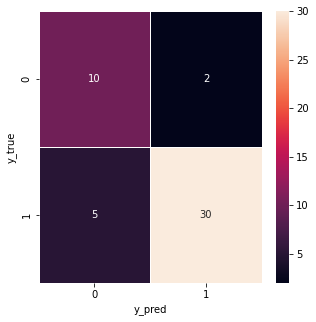

In [18]:
# temperature map
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "white", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()